In [79]:
#CellStrat - Classification project

#Train a classifier to detect MNIST images.

#MNIST is a dataset of 70000 handwritten numerical digit images and corresponding numerical labels which identify what digit
#each image contains. It is available as part of Scikit-Learn library.

#The task here is to use one or more of the classification algorithms to train a model on the MNIST image database to detect
#images which contain the digit 5 or not.

#To make the processing faster, we will finally work with 10000 of the samples only, not the entire 70000 images.

#Ref : "Hands-on Machine Learning with Scikit-Learn and TensorFlow" by Aurelien Geron

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [7]:
type(mnist)

sklearn.datasets.base.Bunch

In [82]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [83]:
y.shape

(70000,)

In [84]:
28*28

784

In [85]:
#each 28 by 28 image is flattened into a vector of 784 values. so it is no longer an IMAGE, just a flat vector of 784 values.

Saving figure some_digit_plot


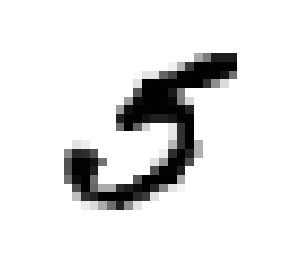

In [86]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [87]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [88]:

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


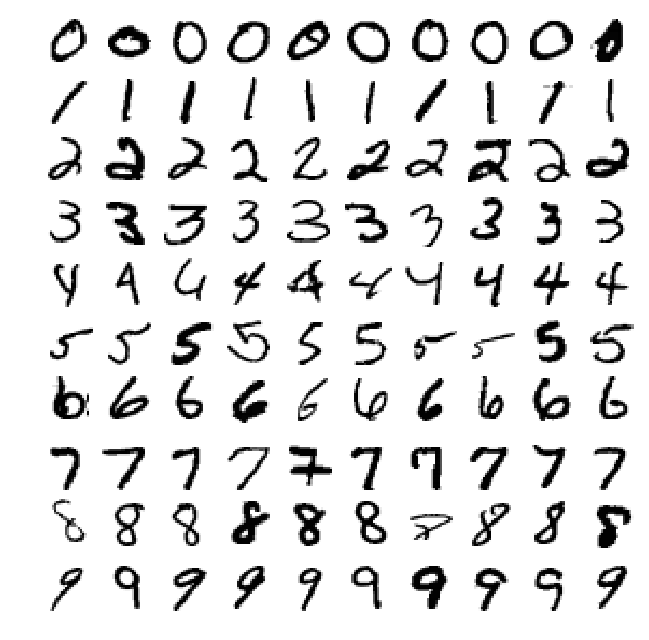

In [89]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [90]:
y[36000]

5.0

In [91]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [92]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

In [93]:
#build a binary classifier which identifies an image as being a 5 or not 5. Print the accuracy of your trained model.

#hint : you can use an Logistic Regression, SVM, Decision Tree, KNN etc. The SGDClassifier class encapsulates many of these
#algorithms. (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [94]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [95]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42,max_iter=5, tol=None)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [96]:
#by default SGDClassifier uses hinge loss, which gives a linear SVM classifier.

In [97]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [98]:
#print cross validation score of the classifier

In [99]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9502 ,  0.96565,  0.96495])

In [100]:
#now print the confusion matrix of the 5 or not-5 classifier

#Also print precision and recall values

In [101]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [102]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

In [103]:
y_train_perfect_predictions = y_train_5

In [104]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [105]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.76871350203503808

In [106]:
4344 / (4344 + 1307)

0.7687135020350381

In [107]:
recall_score(y_train_5, y_train_pred)

0.80132816823464303

In [108]:
4344 / (4344 + 1077)

0.801328168234643

## Try with other classifiers

In [109]:
#Exercise 1 : Build a 5 vs not-5 binary classifier using KNN with no of neighbours as 4.
#(hint : use Scikit-Learn libary KNeighboursClassifier)
#(hint : look at the KNN tutorial taught earlier in the course)

#Print accuracy score of the model

#note that it might take 10 minutes to print the accuracy score

In [110]:
#Exercise 2 : Build a 5 vs not-5 binary classifier using Logistic Regression
#(hint : use Scikit-Learn libary LogisticRegression)
#(hint : look at the Logistic Regression tutorial taught earlier in the course)

#Print confusion matrix, accuracy score and cross validation score (hint : see code above as to how we do this)

#note that it might take 10 minutes to print the accuracy score

In [111]:
#Bonus Exercise : Build a 5 vs not-5 binary classifier using SVMs

#(hint : look at the SVM tutorial taught earlier in the course)

#Print accuracy score

#note that it might take 10 minutes to print the accuracy score